<a id="index"></a>
<h1 align="center">Panorama de extração de dados através de uma API</h1> 
<br><br>
Esse tutorial tem como intuito instruir o leitor aos procedimentos comuns de um processo de extração de dados. Situações com diferentes processos de autentificação e diferentes estruturas de arquivos são apresentados através dos seguintes exemplos:
- Banco de dados do Mercado Livre;
- Banco de dados de Reclamações do PROCON.

# Índice
<ol>
 <li><a href="#1">O que é data scrapping?</a></li>
 <li><a href="#2">O que é uma API?</a></li>
 <li><a href="#3">Quais são as variações do problema?</a></li>
 <li><a href="#4">Como retirar os dados da internet?</a>
    <ul>
        <li><a href="#41">Caso 1: Extração de dados do Mercado Livre</a>
            <ul>
                <li><a href="#411">Como fazer requisições em uma API?</a></li>
                <li><a href="#412">Como certificar o êxito da requisição?</a></li>
                <li><a href="#413">Como funciona a estrutura .json?</a></li>
                <br>
            </ul>
        </li>
        <li><a href="#42">Caso 2: Extração de dados do Portal Brasileiro de dados abertos (Reclamações do PROCON)</a>
            <ul>
                <li><a href="#421">Como realizar _Web Scrapping_ com BeautifulSoup?</a></li>
                <li><a href="#422">Como baixar arquivos através do python?</a></li>
                <li><a href="#423">Como extrair arquivos de um diretório compactado?</a></li>
                <li><a href="#424">Como transformar dados em .csv para .json?</a></li>
                <br>
            </ul>
        </li>
    </ul>
 </li>
</ol>
***
<a id="1"></a>
# Perguntas e respostas

## 1. O que é Data Scrapping e por que é relevante?
 R. A 'Raspagem de Dados' simboliza o processo de extração de informações de dados para leitura provenientes de algum aplicativo ou serviço. O processo de _Data Scrapping_ manipula da estrutura interna do serviço ou aplicativo, permitindo o acesso de dados não processados e de grande valor agregado para análises
 
<a id="2"></a>
## 2. O que é uma API
 R. Os dados de interesse enviados à interface gráfica são transmitidos através de uma 'Interface de programação de aplicação' (API - _Application programming interface_). Essa é a porta de acesso para a grande maioria dos dados de serviços e aplicações. Nessa interface, o programador pode fornecer parâmetros específicos que podem direcionar os resultados trazidos pela API.<br><br>
 _Obs. Na maioria dos casos, empresas documentam e apresentam suas APIs, incetivando o desenevolvimento de novas funcionalidades. Porém, em alguns casos, sites escondem suas APIs para evitar a manipulação de suas informações sensíveis. Todavia, utilizando técnicas de Data Scrapping, geralmente é possível acessar tais APIs._

<a id="3"></a>
## 3. Quais são as variações de dados encontrados?
 R. Os formatos de dados extraídos mais comuns são

 <div class="alert alert-block alert-info">
  <p ><a href="http://bit.ly/2DJXkzl">[CSV]</a>: os arquivos Comma-separated values, também conhecido como CSV, são arquivos de texto de formato com uma ordenação de bytes ou um formato de terminador de linha</p>
   <p ><a href="http://bit.ly/2DNkCbF">[XML]</a>: é uma linguagem de marcação similar ao HTML, porém permite a inserção de campos defindos pelo usuário, capaz de descrever diversos tipos de dados. Seu propósito principal é a facilidade de compartilhamento de informações através da internet.</p>
    <p ><a href="http://bit.ly/2njznZc">[JSON]</a>: um acrônimo de JavaScript Object Notation, é um formato de padrão aberto independente de troca de dados simples entre sistemas, utilizando texto legível a humanos, no formato atributo-valor, muito usado em web services  o uso do XML</p>
</div>
 
O problema também pode ser fragmentado em tipos de arquitetura de aquisição de dados, porém pela popularidade da adoção da arquitetura REST, somente essa será abordada nos exemplos aqui mostrados. Para mais informações sobre os tipos de API: [[1]](https://ffeathers.wordpress.com/2014/02/16/api-types/) e [[2]](https://www.soapui.org/testing-dojo/best-practices/soap-vs-rest-challenges.html).

<a id="4"></a>     
## 4. Como retirar os dados da internet?
A disponibilização de dados na internet é facilitada pela boa documentação e até a criação de sistemas de construção de requisições em mais alto nível, como por exemplo o caso do banco de dados de tarifas por instituições financeiras que utiliza o [Swagger](https://olinda.bcb.gov.br/olinda/servico/Informes_ListaTarifasPorInstituicaoFinanceira/versao/v1/swagger-ui3).
Os casos abaixo exemplificam os processos comuns a extração de dados com e sem a utilização de uma API.
***
<a id="41"></a>
### Caso 1: Extração de dados do Mercado Livre
<a id="411"></a>
#### Passo 1: Imports e configurações gerais
Inicialmente, para realizarmos a extração dos dados da API, necessitamos apenas da biblioteca _requests_, que simula requisições HTTP através de comandos em Python [[mais informações]](http://docs.python-requests.org/en/master/#the-user-guide)

In [11]:
import requests #biblioteca usada para fazer as requisições
from beautifier import RenderJSON #Opcional: Embelezar as estruturas de dados em JSON

#### Passo 2: Analisar o site de interesse
Nesse caso, a API do Mercado Livre dispõe de documentação. Essa descreve a maneira a qual se deve operar a API a fim de retirar as informações de interesse. No exemplo abaixo, desejamos coletar as informações de produtos relacionadas com uma busca arbitrária, escolhida por você, leitor.

As variações de operação de uma API giram em torno do endereço de busca e os parâmetros de busca

<div class="alert alert-block alert-info">
    <h3> Buscar ofertas por palavra(s) chave</h3>
    <blockquote>
        <p>Sintaxe <a href="http://bit.ly/2nplicX">[Fonte]</a>: /sites/MLU/search?q=palavra-chave</p>
    </blockquote>
    <p>Ex: Buscar 'chromecast' -  https://api.mercadolibre.com/sites/MLU/search?q=chromecast</p>
</div>

As requisições de dados, como exemplificada acima, pode usualmente chamada de _query_.
<a id='412'></a>
<h4 align="right"><a href="#index">[Index]</a></h4> 

In [15]:
#---- DADOS PARA REQUISIÇÃO --------------------------------------------------------------------------------------------------

url = 'https://api.mercadolibre.com/sites/MLB/search?' #Endereço de busca segundo documentação da API
query = input('Qual a busca desejada? ') #Abrir caixa de busca para usuário digitar busca
payload = {'q': str(query)} #Transformação da busca em parâmetro da API

#---- REQUISIÇÃO -------------------------------------------------------------------------------------------------------------
#Para fazer a requisição dos dados, usar o método 'get' da biblioteca request, inserindo o endereço de busca e seus parâmetros

request = requests.get(url, params = payload)
print('\n\n'+str(request))

Qual a busca desejada? samsung
Buscando por "samsung"


<Response [200]>


<a id='413'></a>
<div class="alert alert-block alert-success">
    <p>Se o resultado do request for [200], significa que a busca foi sucedida. Para entender mais sobre os códigos de estado HTTP, <a href="https://pt.wikipedia.org/wiki/Lista_de_c%C3%B3digos_de_estado_HTTP"> clique aqui</a></p>
</div>
***
A API do Mercado Livre retorna as pesquisas em uma estrutura de dados JSON. Para lê-la, podemos utlizar os seguintes comandos abaixo:
<br>
<h4 align="right"><a href="#index">[Index]</a></h4> 

In [36]:
data = request.json() #extrai o conteúdo da requisição para o objeto em JSON. Em python esse é representado por um dicionário
#print(data) #caso o módulo RenderJSON não seja importado
RenderJSON(data) #Ferramenta para facilitar a visualização do arquivo JSON (opcional)

Além de conter os resultados de pesquisa, a API retorna diversos outros atributos de interesse.<br>
Os resultados da pesquisa estão dentro do atributo `results`. <br>
***
<div class="alert alert-block alert-danger">
    <p>Caso não passado como parâmetro, as buscas do Mercado Livre serão limitadas por 50 resultados por página. O máximo de resultados permitidos pela API são 200 por página. Caso seja de interesse buscar todos os resultados, é recomendado utilizar o parâmetro **'limit'** para expandir a busca para o 200 resultados combinada com o uso do parâmetro **'offset'** que extrai os resultados com o deslocamento numério fornecido.
    <br>[Exemplo contido no notebook: Overview from ML API]</p>
</div>
***
<h4 align="right"><a href="#index">[Index]</a></h4> 
Para analisar os dados em forma de tabela, executar os comandos abaixo:

In [25]:
import pandas as pd
df = pd.DataFrame(data['results'])
#df.head(3)

Como é possível observar, algumas colunas ainda estão estruturadas em JSON. É possível aplicar métodos para fragmentar ainda mais a estrutura de dados, porém não é o foco do treinamento.
***
Como a maioria das bases de dados disponíveis, a base do Mercado Livre apresenta algumas inconsistências. Abaixo são demonstrados alguns procedimentos de limpeza de dados
<h4 align="right"><a href="#index">[Index]</a></h4> 

In [23]:
# sorts items by sold quantity and deletes duplicates with less sales (assuming they'd be 0)
df = df.sort_values(by = 'sold_quantity', ascending=False)
df = df.drop_duplicates(subset = ['title'], keep = 'first')

**Como exemplo, uma análise sobre os 3 items mais faturados é apresentada abaixo**

Os 3 itens com maior faturamento: 



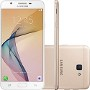

30 - Celular Galaxy J7 Prime G610m 32gb 13mp 4g Tela 5.5 Dourado
http://produto.mercadolivre.com.br/MLB-927522295-celular-galaxy-j7-prime-g610m-32gb-13mp-4g-tela-55-dourado-_JM
1877 unidades vendidas.
Faturamento de R$ 2062823.0.
Preço unitário atual: R$ 1099.0.



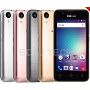

18 - Smartphone Celular Blu Advanc Android 6 = Motog Tela 3g Orig
http://produto.mercadolivre.com.br/MLB-745955802-smartphone-celular-blu-advanc-android-6-motog-tela-3g-orig-_JM
4502 unidades vendidas.
Faturamento de R$ 1028661.98.
Preço unitário atual: R$ 228.49.



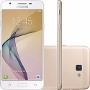

47 - Celular Samsung Galaxy J5 Prime Dourado Dual 4g Câm 13mp/5mp
http://produto.mercadolivre.com.br/MLB-894849287-celular-samsung-galaxy-j5-prime-dourado-dual-4g-cm-13mp5mp-_JM
1207 unidades vendidas.
Faturamento de R$ 964393.0.
Preço unitário atual: R$ 799.0.



In [30]:
from IPython.core.display import Image, display
ITEMS_TO_PLOT = 3


# adds revenue column by an operation with sold_quantity and price
df['revenue'] = df['sold_quantity'] * df['price']

# fixes 'stop_time' to proper date format
df['stop_time'] = pd.to_datetime(df['stop_time'])



df = df.sort_values('revenue', ascending = False)

print('Os ' + str(ITEMS_TO_PLOT) + ' itens com maior faturamento:', '\n')
for index, row in df.head(ITEMS_TO_PLOT).iterrows():
    display(Image(df.loc[index, 'thumbnail']))
    print(str(index) + ' - ' + str(df.loc[index, 'title'])) # uses loc taking advantage of indexing by id made previously
    print(df.loc[index, 'permalink'])
    print(str(df.loc[index, 'sold_quantity']) + ' unidades vendidas.')
    print('Faturamento de R$ ' + str(df.loc[index, 'revenue']) + '.')
    print('Preço unitário atual: R$ ' + str(df.loc[index, 'price']) + '.')
    print()

<h4 align="right"><a href="#index">[Index]</a></h4> 
<a id="42"></a>
### Caso 2: Extração de dados do Portal Brasileiro de dados abertos (Reclamações do PROCON)
O [Portal Brasileiro de Dados Abertos](http://dados.gov.br) é a ferramenta disponibilizada pelo governo para que todos possam encontrar e utilizar os dados e as informações públicas. O caso em questão analisa do dados referentes aos registros históricos de reclamações no PROCON.<br><br>
O formato dos dados do portal não são padronizados, alguns possuem API para retirada de dados em JSON, alguns em arquivos CSV e outros em PDF. Os dados provenientes do PROCON são estruturados no formato .csv e compilados anualmente

<a id="421"></a>
#### Passo 1: Como realizar Web Scrapping com `BeautifulSoup`?
Os arquivos .csv de reclamações estão contidos em diretórios compactados. Para a leitura desses, é necessário realizar o download de todos os ficheiros e a maneira de fazê-los automaticamente é combinando duas bibliotecas.


In [1]:
import requests #Biblioteca usada para fazer as requisições
from bs4 import BeautifulSoup #Biblioteca para analisar o conteúdo de sites

<h4 align="right"><a href="#index">[Index]</a></h4><br>
Inicialmente a página que contém os arquivos de interesse deve ser carregada no python através da biblioteca [`requests`](), depois seu conteúdo é analisado através de uma biblioteca chamada [`BeautifulSoup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) que sistematicamente divide os elementos HTML do site. Através da busca dos elementos HTML que contém um hyperlink com a extensão, conseguimos a lista de downloads que deve ser realizada.

In [2]:
url = "http://dados.gov.br/dataset/cadastro-nacional-de-reclamacoes-fundamentadas-procons-sindec1"
page = requests.get(url) #requisitar conteúdo do site dos dados do governo usando o método 'get' da biblioteca 'requests'

soup = BeautifulSoup(page.content, 'html.parser') #Analisar conteúdo do site com o BeautifulSoup

files = [x['href'] for x in soup.find_all('a', href = True) if 'zip' in x['href']] #Criar lista de hyperlinks com string 'zip'

print('Arquivos:', *list(map(lambda x: "\n"+x[x.find('reclamacoes'):] ,files))) #Imprimir nome dos arquivos disponíveis

Arquivos: 
reclamacoes-fundamentadas-sindec-2009.zip 
reclamacoes-fundamentadas-sindec-2010.zip 
reclamacoes-fundamentadas-sindec-2011.zip 
reclamacoes-fundamentadas-sindec-2012.zip 
reclamacoes-fundamentadas-sindec-2013-1.zip 
reclamacoes-fundamentadas-sindec-2014.zip 
reclamacoes-fundamentadas-sindec-2015.zip 
reclamacoes-fundamentadas-sindec-2016.zip


<h4 align="right"><a href="#index">[Index]</a></h4><br>
<a id="422"></a>
#### Como baixar arquivos através do python?
Com a lista de links criada, `requests.get()` é utilizado novamente para baixar todos os arquivos. Uma pasta temporária foi criada com a biblioteca `tempfile` para evitar a manipulação indevida do usuário. O método `try and except` é utilizado para impedir que erros comprometam a execução do programa.

In [3]:
import os #Acessar arquivos do disco
import tempfile #Criar uma pasta temporária no disco

temp_folder = tempfile.TemporaryDirectory()

for i in files:
    try:
        r = requests.get(i, stream = True)
        with open(os.path.join(temp_folder.name,i[-8:]), 'wb') as f:
            for chunk in r.iter_content(chunk_size = 1024):
                if chunk:
                    f.write(chunk)
                    f.flush()
    except:
        pass

<h4 align="right"><a href="#index">[Index]</a></h4><br>
<a id="423"></a>
#### Como extrair arquivos de um diretório compactado?
A próxima etapa certifica-se que todos os arquivos `.zip` da pasta sejam extraídos e removidos com o uso da biblioteca `zipfile`

In [4]:
import zipfile #Extrair conteúdo do diretorio compactado
while len([file for file in os.listdir(temp_folder.name) if file.endswith('.zip')]) > 0:
    file = [file for file in os.listdir(temp_folder.name) if file.endswith('.zip')][0]
    archive = zipfile.ZipFile(os.path.join(temp_folder.name, file),'r')
    archive.extractall(temp_folder.name)
    archive.close()
    os.remove(os.path.join(temp_folder.name, file))

<h4 align="right"><a href="#index">[Index]</a></h4><br>
Os arquivos .csv então são concatenados em um só DataFrame da biblioteca `pandas`.<br>
Note as configurações utilizadas no método `read_csv()`, como o símbolo separador do arquivo e o tipo de `enconding` utilizado (caracteres latinos)

<div class="alert alert-block alert-danger">
    <p>A variável <strong>LIMIT</strong> pode ser modificada, porém o caso abaixo pode travar caso o número de arquivos lidos (<strong>LIMIT</strong>) for muito grande</p>
</div>

In [6]:
import pandas as pd
LIMIT = 3 #limite de arquivos a se carregar
file_csv = [file_csv for file_csv in os.listdir(temp_folder.name) if file_csv.endswith('.csv')][:LIMIT]
df = pd.concat(list(map(lambda x: pd.read_csv(os.path.join(temp_folder.name,x),sep=';',encoding='latin1',index_col=None), file_csv)))
print('Arquivos:', *list(map(lambda x: "\n"+x[x.find('.csv')-4:x.find('.csv')] ,file_csv)))

#Para deletar os arquivos .csv da pasta, habilitar as duas linhas de código abaixo
#for i in file:
#    os.remove(os.path.join(temp_folder.name,i))

C:\Users\aku\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (0,22) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Arquivos: 
2009 
2010 
2011


**Como exemplo, uma análise dos 10 estados com mais reclamações sobre a empresa de interesse é apresentada abaixo**

In [7]:
empresa = input('Qual a empresa de interesse: ')
df_company = df[df['strNomeFantasia'].str.contains(empresa, na=False, case=False)]
df_state = pd.DataFrame(df_company.groupby('UF')['Atendida'].count())\
.rename(columns={'Atendida': 'Reclamacoes'})\
.sort_values(by = 'Reclamacoes', ascending=False)\
.reset_index(level=0)
print('Os 10 estados com mais reclamações relacionados a : '+str(empresa))
df_state.head(10)

Qual a empresa de interesse: magazine luiza
Os 10 estados com mais reclamações relacionados a : magazine luiza


UF  Reclamacoes
0  MG          466
1  SC          165
2  MS           77
3  GO           48
4  BA           25
5  RS           13
6  PB            9
7  PA            7
8  ES            7
9  MT            6

Para salvar os dados em um formato, como .xlsx, usar a função abaixo, fornecendo o diretório correto

In [16]:
diretorio = os.getcwd() #referenciar o diretório atual
nome_do_arquivo = '\\Reclamações_'+empresa.replace(' ', '_')+'.xlsx' #Reclmaçãoes + Nome da empresa.xlsx
df_company.to_excel(os.getcwd()+nome_do_arquivo)